In [5]:
!pip install pystan~=2.14


  Using cached pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl


In [2]:
# Fetch List of sp500 tickers
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

def get_sp500_tickers():
  table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  sp500_df = table[0]

  tickers = sp500_df['Symbol'].tolist()

  tickers = [ticker.replace('.', '-') for ticker in tickers]

  return tickers


sp500_tickers = get_sp500_tickers()
print(sp500_tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [ ]:
# Fetch csv files with historical data for each ticker containing only Date and Close columns
import yfinance as yf

start_date = '2005-01-01'
end_date ='2024-02-24'

for ticker in sp500_tickers:
  stock_data = yf.download(ticker, start=start_date, end=end_date)

  close_data = stock_data[['Close']].reset_index()

  filename = f"{ticker}.csv"
  close_data.to_csv(filename)

In [45]:
data = pd.read_csv('data/^SPX (2).csv')
data = data[["Date", "Close"]]

data.columns = ["ds", "y"]
data

,ds,y
0,2010-01-04,1132.989990
1,2010-01-05,1136.520020
2,2010-01-06,1137.140015
3,2010-01-07,1141.689941
4,2010-01-08,1144.979980
...,...,...
3574,2024-03-18,5149.419922
3575,2024-03-19,5178.509766
3576,2024-03-20,5224.620117
3577,2024-03-21,5241.529785


In [44]:
from prophet import Prophet

prophet = Prophet(daily_seasonality=True)

prophet.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf055cbh5/9a3jfqjs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf055cbh5/nkj6jfh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65864', 'data', 'file=/tmp/tmpf055cbh5/9a3jfqjs.json', 'init=/tmp/tmpf055cbh5/nkj6jfh6.json', 'output', 'file=/tmp/tmpf055cbh5/prophet_modeldccq268y/prophet_model-20240323112239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future_dates = prophet.make_future_dataframe(periods=2190)
predictions = prophet.predict(future_dates)

predictions_file = predictions[['ds', 'yhat']]
predictions_file.to_csv('SPY_prophet.csv', index=False)

In [37]:
from prophet.plot import plot_plotly
plot_plotly(prophet, predictions)

In [46]:
# Split data
unknown_data = data.iloc[-90:]
data = data.iloc[:-90]

In [47]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf055cbh5/8xqnq86t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf055cbh5/1wnkz43a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88532', 'data', 'file=/tmp/tmpf055cbh5/8xqnq86t.json', 'init=/tmp/tmpf055cbh5/1wnkz43a.json', 'output', 'file=/tmp/tmpf055cbh5/prophet_modelzgu0x9qa/prophet_model-20240323112251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


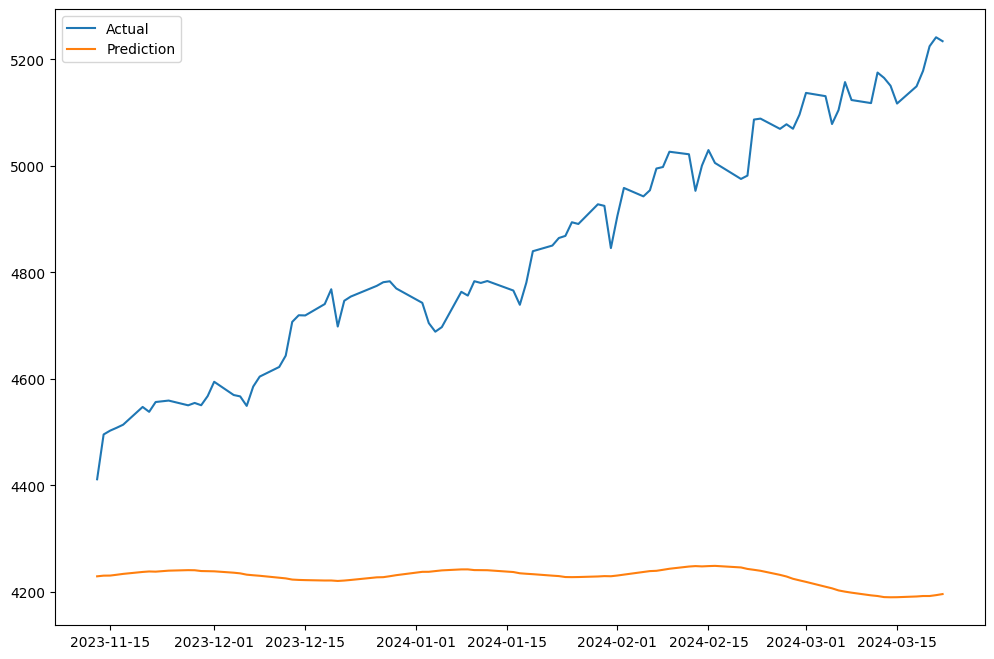

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label="Actual")
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label="Prediction")

plt.legend()

In [49]:
import numpy as np

# Calculate absolute error
absolute_error = np.abs(unknown_data['y'] - pred['yhat'])

# Calculate percentage error
percentage_error = (absolute_error / unknown_data['y']) * 100

# Calculate MAPE
mape = percentage_error.mean()

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 12.69%
